# Mapa de elevación del Valle de Aburrá

Este notebook utiliza datos de elevación del Valle de Aburrá para generar gráficos tanto en 2D como en 3D que representan el mapa de elevación. Además, se calculan los gradientes y se categorizan los ángulos de inclinación, empleando bibliotecas como NumPy y Matplotlib.

## Objetivos de Aprendizaje

Al final de este notebook, los estudiantes serán capaces de:
1. Cargar y manipular datos topográficos usando NumPy.
2. Graficar datos de elevación en 2D y 3D usando Matplotlib.
3. Calcular gradientes y magnitudes para analizar topografía.
4. Categorizar la inclinación del terreno en un mapa topográfico.

### Funciones Necesarias

Importe las funciones necesarias para el análisis y la graficación de los datos.

In [1]:
%matplotlib inline
from analisis_mapa_elevacion import cargar_datos_elevacion, graficar_elevacion, calc_gradiente, graficar_inclinacion

# Descripción de los datos de entrada

- **files/xs.txt**: Este archivo contiene los valores de la coordenada $ x $ en una rejilla 2D de tamaño $ 300 \times 300 $ (en unidades de km). Los valores están organizados en un formato de matriz $ \mathbf{X} $, donde cada fila $ i $ representa una línea de la rejilla en la dirección $ x $:
  $$
  \mathbf{X} = 
  \begin{bmatrix}
  x_{11} & x_{12} & \cdots & x_{1j} \\
  x_{21} & x_{22} & \cdots & x_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  x_{i1} & x_{i2} & \cdots & x_{ij}
  \end{bmatrix}
  $$
  donde $ x_{ij} $ son los valores de la coordenada $ x $ en la posición $ (i, j) $.

- **files/ys.txt**: Este archivo contiene los valores de la coordenada $ y $ en una rejilla 2D de tamaño $ 300 \times 300 $ (en unidades de km). Similar al archivo xs.txt, los valores están organizados en un formato de matriz $ \mathbf{Y} $, donde cada columna $ j $ representa una línea de la rejilla en la dirección $ y $:
  $$
  \mathbf{Y} = 
  \begin{bmatrix}
  y_{11} & y_{12} & \cdots & y_{1j} \\
  y_{21} & y_{22} & \cdots & y_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  y_{i1} & y_{i2} & \cdots & y_{ij}
  \end{bmatrix}
  $$
  donde $ y_{ij} $ son los valores de la coordenada $ y $ en la posición $ (i, j) $.

- **files/zs.txt**: Este archivo contiene los valores de la coordenada $ z $ en la rejilla 2D de tamaño $ 300 \times 300 $ (en unidades de km) definida por $ \mathbf{X} $ y $ \mathbf{Y} $. Los valores están organizados en un formato de matriz $ \mathbf{Z} $, donde cada elemento $ z_{ij} $ representa la altitud en la posición correspondiente de la rejilla:
  $$
  \mathbf{Z} = 
  \begin{bmatrix}
  z_{11} & z_{12} & \cdots & z_{1j} \\
  z_{21} & z_{22} & \cdots & z_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  z_{i1} & z_{i2} & \cdots & z_{ij}
  \end{bmatrix}
  $$
  donde $ z_{ij} $ son los valores de la coordenada $ z $ en la posición $ (i, j) $.

# Cargar Datos desde Archivos de Texto

- Use la función ``np.loadtxt`` para cargar datos desde archivos de texto. Esta función lee los datos de un archivo y los convierte en una matriz de NumPy.

- Use la función ``print`` y ``np.shape`` para verificar el tamaño de las matrices cargadas.

In [2]:
xs, ys, zs = cargar_datos_elevacion('files/xs.txt', 'files/ys.txt', 'files/zs.txt')

(300, 300) (300, 300) (300, 300)


# Graficar datos

- Use ``matplotlib`` para graficar los datos. 

- Use la función ``plot_surface`` de ``matplotlib`` para crear una gráfica de superficie 3D de los datos de ``zs``.

- Grafique los datos de ``zs`` como una imagen usando la función ``imshow``.

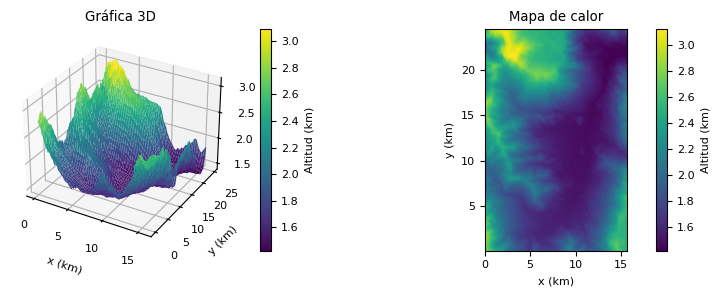

In [3]:
graficar_elevacion(xs, ys, zs)

# Gradiente 

El gradiente de un campo escalar $ z(x, y) $ es un vector que se denota comúnmente como $ \nabla z(x, y) $ y se define como:

$$
\nabla z = \left( \frac{\partial z}{\partial x}, \frac{\partial z}{\partial y} \right)
$$

donde:
- $ \frac{\partial z}{\partial x} $ es la derivada parcial de $ z $ con respecto a $ x $.
- $ \frac{\partial z}{\partial y} $ es la derivada parcial de $ z $ con respecto a $ y $.

El gradiente tiene las siguientes propiedades:

- La dirección del gradiente es la dirección de mayor incremento de $ z $.
- La magnitud del gradiente indica la tasa de cambio de $ z $ en esa dirección.

# Gradiente a través del método de diferencias finitas

La función `calc_gradiente` calcula los gradientes numéricos de un campo escalar, que en esta caso son elevaciones (en km). Representado por una matriz 2D llamada $ \text{zs} $. Se utiliza el métodos númerico de diferencias finitas. Los gradientes se calculan en ambas direcciones, $ x $ e $ y $.

## Entradas

- $ \text{zs} $: Una matriz 2D que representa el campo escalar (valores de elevación).
- $ dx $: El tamaño del paso espacial en la dirección $ x $.
- $ dy $: El tamaño del paso espacial en la dirección $ y $.

## Salidas

- $ dzdx $ y $ dzdy $: Matrices 2D que representan el gradiente de $ z $ con respecto a $ x $ y $ y $ (es decir, $ \frac{\partial z}{\partial x} $ y $ \frac{\partial z}{\partial y} $).

## Descripción Matemática

1. **Gradiente en la dirección $ x $**:
   Para cada punto interior $ (i, j) $ donde $ i $ es el índice de la fila y $ j $ es el índice de la columna:
   $$
   \frac{\partial z}{\partial x} \approx \frac{z_{i,j+1} - z_{i,j-1}}{2 \cdot dx}
   $$
   Esto utiliza la fórmula de la diferencia central para puntos que no están en el límite.

   Para los puntos en los bordes:
   - Borde izquierdo $ (j = 0) $:
     $$
     \frac{\partial z}{\partial x} \approx \frac{z_{i,1} - z_{i,0}}{dx}
     $$
   - Borde derecho $ (j = \text{cols}-1) $:
     $$
     \frac{\partial z}{\partial x} \approx \frac{z_{i,\text{cols}-1} - z_{i,\text{cols}-2}}{dx}
     $$

2. **Gradiente en la dirección $ y $**:
   Para cada punto interior $ (i, j) $:
   $$
   \frac{\partial z}{\partial y} \approx \frac{z_{i+1,j} - z_{i-1,j}}{2 \cdot dy}
   $$
   Para los puntos en los bordes:
   - Borde superior $ (i = 0) $:
     $$
     \frac{\partial z}{\partial y} \approx \frac{z_{1,j} - z_{0,j}}{dy}
     $$
   - Borde inferior $ (i = \text{rows}-1) $:
     $$
     \frac{\partial z}{\partial y} \approx \frac{z_{\text{rows}-1,j} - z_{\text{rows}-2,j}}{dy}
     $$



- Cree un función que realize teste calculo en ambas direcciones $x$ y $y$. 
- En cada dirección considere los tres casos mencionados (puntos interiores y dos bordes).
- Tenga en cuenta que dx y dy son constantes. 

In [13]:
# Calcular gradientes
dzdx, dzdy = calc_gradiente(zs, xs, ys)

# Magnitud del gradiente e inclinación

La **magnitud** del gradiente, denotada como $ |\nabla z(x,y)| $, se calcula utilizando la norma euclidiana del vector gradiente:

$$
|\nabla z(x,y)| = \sqrt{\left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y}\right)^2}
$$

Esta expresión representa la tasa de cambio máxima del campo escalar $ z $ y se puede interpretar como **pendiente máxima** del campo en el punto considerado. Además, tenemos que:

$$
\theta(x,y) =  \arctan(\text{pendiente}) = \arctan(|\nabla z(x,y)|)
$$

donde $ \theta(x,y) $ es el ángulo de inclinación en la coordenada $ (x,y) $. Considere las categorías de inclinación:

- Entre 0° y 15°: inclinación baja o moderada.
- Entre 15° y 30°: inclinación alta.
- Entre 30° y 45°: inclinación muy alta.
- Mayor a 45°: inclinación escarpada.

Ahora calcule y grafique las inclinaciones del mapa topográfico dividiendo el mapa de calor en las cuatro categorias establecidas.

- Use ``np.hypot`` para calcular la magnitud del vector.
- Use ``np.arctan`` para calcular el ángulo de inclinación en radiales y ``np.degrees`` para convertirlo a grados.

Luego, para el mapa de calor:

- Use ``plt.imshow`` para graficar el mapa de calor. 
- defina un mapa con cinco límites (0, 15, 30, 45, 60).


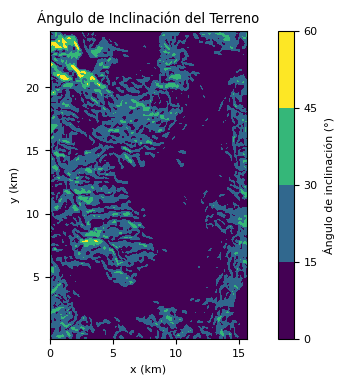

In [14]:
graficar_inclinacion(xs, ys, dzdx, dzdy)